Задача mnist - распознавание рукописных цифр

In [1]:
# !pip install keras
# # датасет mnist
# !pip install mnist
# # связть библиотек keras и scisearch 
# !pip install scikeras[tensorflow]

In [2]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
#import keras.utils
import pandas as pd
import mnist
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

Загружаем датасет из модуля mnist

In [3]:
x_train = mnist.train_images()

In [4]:
x_train.shape

(60000, 28, 28)

Разделяем данные на обучающие и тестовые

In [5]:
x_test = mnist.test_images()
y_test = mnist.test_labels()
y_train = mnist.train_labels()

Задаем формат входных данных: <br>
* 28 на 28 - размер изображения <br>
* 1 - цветовой канал

In [6]:
input_shape = (28, 28, 1)

Нормализуем пиксели изображения (приводим к единому масштабу)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

Преобразовываем формат "ответов" в одномерный массив

In [8]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Строим и компилируем модель

In [9]:
def create_model():
      model = keras.Sequential([
            keras.Input(shape=input_shape),
            Flatten(),
            Dense(50, activation = 'relu'),
            Dense(10, activation = 'softmax')
            ] )
      
      model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )
      return model

In [10]:
model_hw = create_model()

Проводим обучение

In [11]:
%%time

history = model_hw.fit(x_train, y_train_cat, batch_size=64, epochs=7)

Epoch 1/7
938/938 [==============================] - 6s 4ms/step - loss: 0.3707 - accuracy: 0.8996
Epoch 2/7
938/938 [==============================] - 2s 2ms/step - loss: 0.1895 - accuracy: 0.9465
Epoch 3/7
938/938 [==============================] - 2s 2ms/step - loss: 0.1444 - accuracy: 0.9588
Epoch 4/7
938/938 [==============================] - 3s 3ms/step - loss: 0.1188 - accuracy: 0.9657
Epoch 5/7
938/938 [==============================] - 2s 2ms/step - loss: 0.1008 - accuracy: 0.9703
Epoch 6/7
938/938 [==============================] - 3s 3ms/step - loss: 0.0872 - accuracy: 0.9747
Epoch 7/7
938/938 [==============================] - 3s 3ms/step - loss: 0.0771 - accuracy: 0.9768
CPU times: total: 36.8 s
Wall time: 21.6 s


Получили модель точностью 97,68%

Строим график точности модели по эпохам

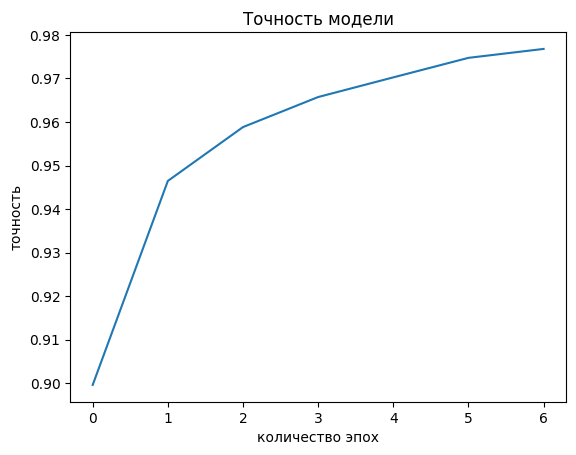

In [12]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

Строим график функции потерь по эпохам

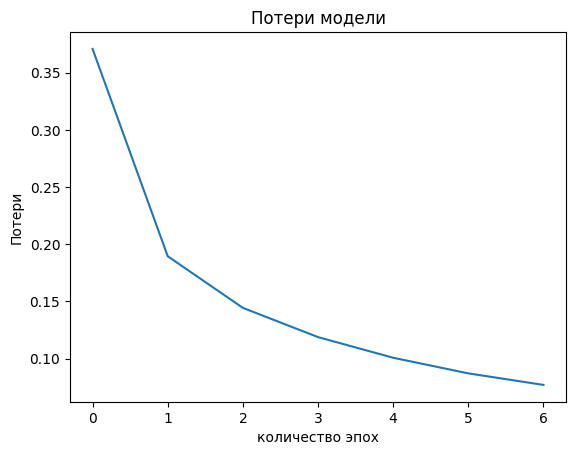

In [13]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

#### Применим GridSearchCV и найдем оптимальную модель по разным параметрам

Зададим параметры, которые хотим проверить

In [14]:
# размер батча. в нашей модели было - 64
batch_size_lst = [32, 64, 100]
# кол-во эпох. в нашей - 7
epochs_lst = [4, 7, 10]
# оптимизатор, 
optimizer_lst = ['SGD', 'RMSprop', 'Adam']

In [15]:
model = KerasClassifier(create_model)
params = dict(batch_size=batch_size_lst, epochs=epochs_lst, optimizer=optimizer_lst)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(x_train, y_train_cat)
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/4
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3639 - accuracy: 0.8970
Epoch 2/4
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1819 - accuracy: 0.9472
Epoch 3/4
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1376 - accuracy: 0.9609
Epoch 4/4
625/625 [==============================] - 1s 2ms/step
Epoch 1/4
1250/1250 [==============================] - 5s 3ms/step - loss: 0.3612 - accuracy: 0.9016
Epoch 2/4
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1794 - accuracy: 0.9488
Epoch 3/4
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1378 - accuracy: 0.9607
Epoch 4/4
625/625 [==============================] - 1s 2ms/step
Epoch 1/4
1250/1250 [==============================] - 5s 3ms/step - loss: 0.3793 - accuracy: 0.8933
Epoch 2/4
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1834 - accuracy: 0.9474
Epoch 3/4
1250/1250 [==============================] - 4s 3ms/

In [16]:
df = pd.DataFrame(grid_result.cv_results_)

In [17]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size', 'param_epochs', 'param_optimizer', 'mean_test_score']].head(10)


,param_batch_size,param_epochs,param_optimizer,mean_test_score
8,32,10,Adam,0.965683
6,32,10,SGD,0.964150
3,32,7,SGD,0.963917
5,32,7,Adam,0.963667
15,64,10,SGD,0.963400
7,32,10,RMSprop,0.963383
17,64,10,Adam,0.963333
4,32,7,RMSprop,0.963250
25,100,10,RMSprop,0.962683
26,100,10,Adam,0.962067


Лучшая модель с параметрами: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adam'} показала точность в 96,56%